In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\USER\Documents\Tradingstuff\IV_PI_Stratdf.csv")
df.set_index('Open time',inplace=True)
df.drop(columns=['raw_IV'],inplace=True)
df.head()

,close_price,log_return,smoothed_IV,min_max_PI
Open time,,,,
2023-05-31 17:00:00,27044.3,0.004284,44.98,-0.000976
2023-05-31 18:00:00,27027.7,-0.000614,44.78,-0.000702
2023-05-31 19:00:00,26999.5,-0.001044,44.57,-0.000788
2023-05-31 20:00:00,27096.9,0.003601,44.66,-0.000785
2023-05-31 21:00:00,27081.9,-0.000554,44.88,-0.000848


In [3]:
df['rolling_std_30'] = df['log_return'].rolling(window=720).std()
df['rolling_annual_vol_30'] = 100 * df['rolling_std_30'] * np.sqrt(8760)
df['Vol_Spread'] = df['smoothed_IV'] - df['rolling_annual_vol_30']
df.head()

,close_price,log_return,smoothed_IV,min_max_PI,rolling_std_30,rolling_annual_vol_30,Vol_Spread
Open time,,,,,,,
2023-05-31 17:00:00,27044.3,0.004284,44.98,-0.000976,NaN,NaN,NaN
2023-05-31 18:00:00,27027.7,-0.000614,44.78,-0.000702,NaN,NaN,NaN
2023-05-31 19:00:00,26999.5,-0.001044,44.57,-0.000788,NaN,NaN,NaN
2023-05-31 20:00:00,27096.9,0.003601,44.66,-0.000785,NaN,NaN,NaN
2023-05-31 21:00:00,27081.9,-0.000554,44.88,-0.000848,NaN,NaN,NaN


PACF values for log_return:
 [ 1.00000000e+00 -2.78940334e-02  5.93311399e-03 -3.54741744e-03
 -5.70511523e-03 -3.10684085e-03  6.20052564e-03  6.87576425e-03
  9.56340782e-04  4.76060336e-03  6.54371495e-05 -9.27211556e-03
  1.55338779e-04  7.29520596e-04 -8.82061480e-03  4.52369112e-03
 -9.66723505e-03  6.06169475e-03  2.04689230e-02 -2.17891739e-03
 -1.15498173e-02  1.63799940e-02 -2.58714269e-02 -2.47241419e-02
 -2.85971026e-02 -8.49524893e-03  2.00474765e-02 -7.63743062e-03
 -1.55384822e-02  1.98149911e-04  1.76120609e-02  1.36576000e-02
 -1.16031028e-02  3.73478409e-03  1.03129424e-02  9.55516672e-03
  1.18911337e-02 -9.22484220e-03  6.38746291e-04  7.35833632e-03
 -6.10284557e-03]


<Figure size 1000x600 with 0 Axes>

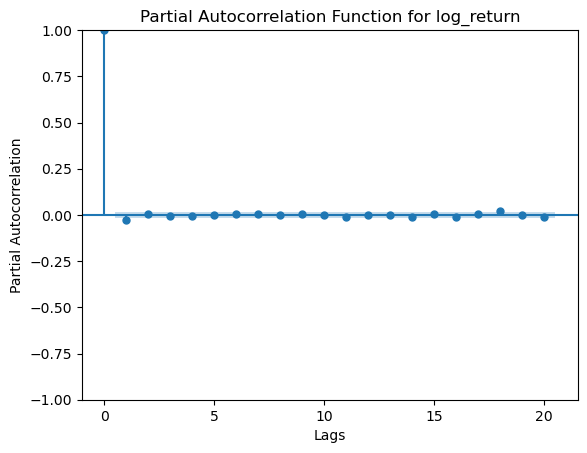

PACF values for smoothed_IV:
 [ 1.00000000e+00  9.98651140e-01 -3.69482929e-02 -8.87980537e-03
  4.30342076e-02 -1.87557924e-04  1.43800394e-02 -4.79921990e-03
 -3.63308617e-03  1.22236653e-02  1.22009866e-02  4.01305275e-02
  2.27234166e-02  2.36130006e-02  3.00885383e-03  1.02840142e-02
  1.67004118e-02  4.33661717e-03 -1.65174992e-02  2.37887689e-02
 -1.10603269e-03 -4.29434229e-03 -1.63174671e-02 -3.30652456e-02
  4.54987535e-03  3.94018063e-03  1.02963353e-02 -1.77282759e-02
 -1.52583798e-02 -3.01499723e-03 -2.87408550e-04  5.91183499e-03
  3.16080904e-03  1.29975006e-02 -2.87368359e-03 -8.55547692e-03
  2.21869925e-03  2.97583918e-04  1.72176336e-02  8.73309726e-03
  1.00550712e-03]


<Figure size 1000x600 with 0 Axes>

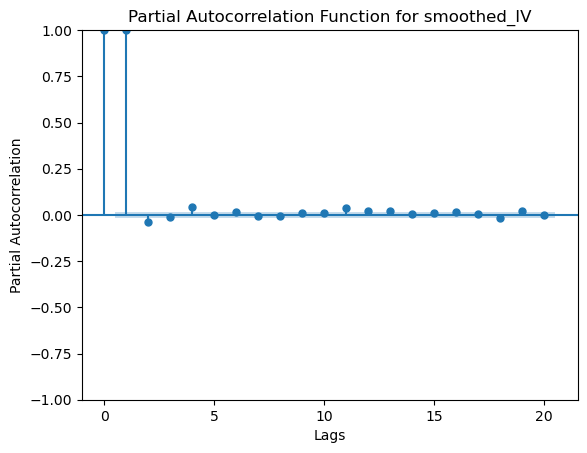

PACF values for min_max_PI:
 [ 1.00000000e+00  8.31140108e-01  4.01581617e-01  2.66609952e-01
  1.89647079e-01  1.62283936e-01  1.47468610e-01  8.07395289e-02
  8.53904556e-02  7.26927533e-02  7.54109504e-02  4.50557280e-02
  5.78091297e-02  3.91079434e-02  2.31528842e-02  3.04427364e-02
  3.97302118e-02  4.80849064e-02  4.23002408e-02  3.31512859e-02
  3.31198075e-02  1.94141233e-02  2.81979528e-02  2.70325853e-02
  3.36204935e-02  3.38430394e-02  2.71226736e-02  2.26364635e-02
  5.08490123e-03  7.51843240e-03  9.54173275e-03  3.32435732e-03
  4.05535054e-03  3.79952311e-03  1.29815798e-02  1.25365458e-02
 -1.61608410e-03  3.61009807e-03  2.62831286e-04  1.90618536e-02
  2.16396240e-03]


<Figure size 1000x600 with 0 Axes>

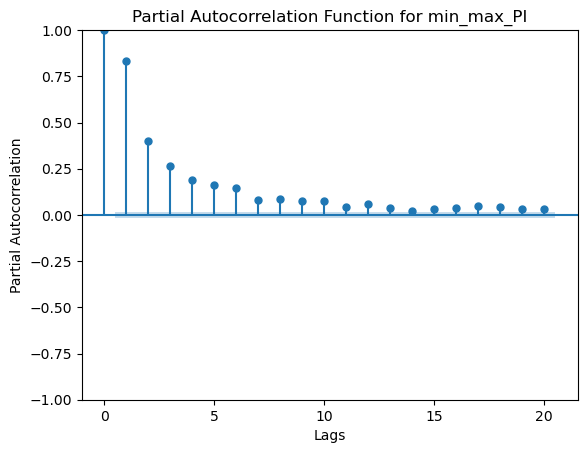

PACF values for Vol_Spread:
 [ 1.00000000e+00  9.98093060e-01 -4.97907594e-02 -1.81722851e-02
  2.08118731e-02 -1.15989614e-02  1.00345300e-02 -1.15013915e-02
 -4.72140082e-03  1.35463649e-02  1.49236314e-03  3.78948534e-02
  1.26454931e-02  1.67021515e-02 -4.60795710e-03  6.97795904e-03
  9.97349639e-03 -7.77985714e-04 -2.72580825e-02  2.10702725e-02
 -2.16554361e-03 -9.70122337e-03 -1.85497128e-02 -3.60184667e-02
  1.64084823e-03 -7.03521791e-03  4.12820250e-03 -1.37408878e-02
 -1.17887518e-02 -8.63380684e-03 -6.87944262e-03  1.60694471e-03
  5.55969181e-03  1.82727270e-02 -2.65479927e-03 -6.16990559e-03
  1.01322873e-03 -1.80775603e-03  1.88828983e-02  7.07525128e-03
  2.11100963e-03]


<Figure size 1000x600 with 0 Axes>

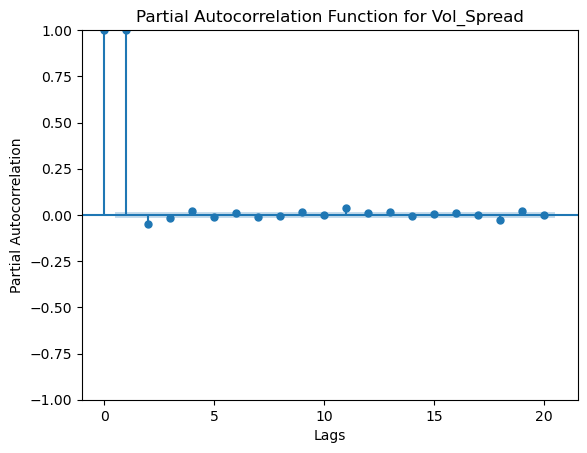

In [4]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf

# Assuming df is your DataFrame with columns:
# 'log_return', 'smoothed_IV', 'min_max_PI', 'Vol_Spread'

columns_to_analyze = ['log_return', 'smoothed_IV', 'min_max_PI', 'Vol_Spread']

for col in columns_to_analyze:
    # Remove missing values if any
    series = df[col].dropna()
    
    # Calculate PACF values (optional if you just need the plot)
    pacf_values = pacf(series, nlags=40, method='ywm')
    print(f"PACF values for {col}:\n", pacf_values)
    
    # Plot the PACF
    plt.figure(figsize=(10, 6))
    plot_pacf(series, lags=20, method='ywm')
    plt.title(f"Partial Autocorrelation Function for {col}")
    plt.xlabel("Lags")
    plt.ylabel("Partial Autocorrelation")
    plt.show()

In [5]:
columns_to_lag = ['smoothed_IV', 'min_max_PI', 'Vol_Spread']

# Define the maximum lag
max_lag = 6

# Create lagged columns for each specified column
for col in columns_to_lag:
    for lag in range(1, max_lag + 1):
        df[f"{col}_lag_{lag}"] = df[col].shift(lag)
df.head()

,close_price,log_return,smoothed_IV,min_max_PI,rolling_std_30,rolling_annual_vol_30,Vol_Spread,smoothed_IV_lag_1,smoothed_IV_lag_2,smoothed_IV_lag_3,...,min_max_PI_lag_3,min_max_PI_lag_4,min_max_PI_lag_5,min_max_PI_lag_6,Vol_Spread_lag_1,Vol_Spread_lag_2,Vol_Spread_lag_3,Vol_Spread_lag_4,Vol_Spread_lag_5,Vol_Spread_lag_6
Open time,,,,,,,,,,,,,,,,,,,,,
2023-05-31 17:00:00,27044.3,0.004284,44.98,-0.000976,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-31 18:00:00,27027.7,-0.000614,44.78,-0.000702,NaN,NaN,NaN,44.98,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-31 19:00:00,26999.5,-0.001044,44.57,-0.000788,NaN,NaN,NaN,44.78,44.98,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-31 20:00:00,27096.9,0.003601,44.66,-0.000785,NaN,NaN,NaN,44.57,44.78,44.98,...,-0.000976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-31 21:00:00,27081.9,-0.000554,44.88,-0.000848,NaN,NaN,NaN,44.66,44.57,44.78,...,-0.000702,-0.000976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
horizons = [3, 4, 5, 6, 7, 8]  # for instance

threshold_return = 0.02  # 2%

for h in horizons:
    # Compute forward log return: ln(P[t+h] / P[t])
    df[f'fwd_ret_{h}'] = np.log(df['close_price'].shift(-h) / df['close_price'])
    
    # Create a ternary label:
    # 1 if forward log return > 2%, -1 if forward log return < -2%, otherwise 0.
    conditions = [
        df[f'fwd_ret_{h}'] > threshold_return,
        df[f'fwd_ret_{h}'] < -threshold_return
    ]
    choices = [1, -1]
    df[f'label_{h}'] = np.select(conditions, choices, default=0)

# Because the last h rows are NaN for fwd_ret, drop rows with NaN in any fwd_ret column
df.dropna(subset=[f'fwd_ret_{h}' for h in horizons], how='all', inplace=True)

# Print statistics for each horizon
for h in horizons:
    ret_col = f'fwd_ret_{h}'
    label_col = f'label_{h}'
    
    # Filter out rows where this horizon is NaN
    valid_rows = df[ret_col].dropna()
    
    if valid_rows.empty:
        print(f"No valid data for horizon {h}, skipping...\n")
        continue
    
    print(f"=== Horizon {h} ===")
    print(f"Forward Log Return '{ret_col}' Stats:\n", valid_rows.describe())
    
    # Label distribution
    label_mean = df.loc[valid_rows.index, label_col].mean()
    label_counts = df.loc[valid_rows.index, label_col].value_counts().sort_index()
    
    print(f"\nLabel '{label_col}' Distribution:")
    print(f" - Proportion of 1: {(df.loc[valid_rows.index, label_col] == 1).mean():.2%}")
    print(f" - Proportion of -1: {(df.loc[valid_rows.index, label_col] == -1).mean():.2%}")
    print(f" - Proportion of 0: {(df.loc[valid_rows.index, label_col] == 0).mean():.2%}")
    print(f" - Count of labels:\n{label_counts}")
    
    print("\n" + "-"*40 + "\n")

=== Horizon 3 ===
Forward Log Return 'fwd_ret_3' Stats:
 count    14469.000000
mean         0.000282
std          0.008726
min         -0.076676
25%         -0.003232
50%          0.000185
75%          0.003653
max          0.086522
Name: fwd_ret_3, dtype: float64

Label 'label_3' Distribution:
 - Proportion of 1: 2.25%
 - Proportion of -1: 1.98%
 - Proportion of 0: 95.76%
 - Count of labels:
label_3
-1      287
 0    13856
 1      326
Name: count, dtype: int64

----------------------------------------

=== Horizon 4 ===
Forward Log Return 'fwd_ret_4' Stats:
 count    14468.000000
mean         0.000374
std          0.010051
min         -0.087033
25%         -0.003636
50%          0.000229
75%          0.004262
max          0.081468
Name: fwd_ret_4, dtype: float64

Label 'label_4' Distribution:
 - Proportion of 1: 3.26%
 - Proportion of -1: 2.72%
 - Proportion of 0: 94.02%
 - Count of labels:
label_4
-1      393
 0    13603
 1      472
Name: count, dtype: int64

------------------------

In [8]:
window_size = 720
df['rol_mean_PI'] = df['min_max_PI'].rolling(window=window_size).mean()
df['rol_std_PI'] = df['min_max_PI'].rolling(window=window_size).std()
df['z_score_PI'] = (df['min_max_PI'] - df['rol_mean_PI']) / df['rol_std_PI']

df['rol_mean_Vol_Spread'] = df['Vol_Spread'].rolling(window=window_size).mean()
df['rol_std_Vol_Spread'] = df['Vol_Spread'].rolling(window=window_size).std()
df['z_score_Vol_Spread'] = (df['Vol_Spread'] - df['rol_mean_Vol_Spread']) / df['rol_std_Vol_Spread']

df

,close_price,log_return,smoothed_IV,min_max_PI,rolling_std_30,rolling_annual_vol_30,Vol_Spread,smoothed_IV_lag_1,smoothed_IV_lag_2,smoothed_IV_lag_3,...,fwd_ret_7,label_7,fwd_ret_8,label_8,rol_mean_PI,rol_std_PI,z_score_PI,rol_mean_Vol_Spread,rol_std_Vol_Spread,z_score_Vol_Spread
Open time,,,,,,,,,,,,,,,,,,,,,
2023-05-31 17:00:00,27044.3,0.004284,44.98,-0.000976,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000573,0,0.000784,0,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-31 18:00:00,27027.7,-0.000614,44.78,-0.000702,NaN,NaN,NaN,44.98,NaN,NaN,...,0.001398,0,-0.012008,0,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-31 19:00:00,26999.5,-0.001044,44.57,-0.000788,NaN,NaN,NaN,44.78,44.98,NaN,...,-0.010964,0,-0.008589,0,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-31 20:00:00,27096.9,0.003601,44.66,-0.000785,NaN,NaN,NaN,44.57,44.78,44.98,...,-0.012190,0,-0.011122,0,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-31 21:00:00,27081.9,-0.000554,44.88,-0.000848,NaN,NaN,NaN,44.66,44.57,44.78,...,-0.010568,0,-0.008864,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-23 09:00:00,101635.9,-0.005357,60.51,-0.001488,0.005758,53.894049,6.615951,61.03,61.12,61.22,...,0.033516,1,NaN,0,-0.000724,0.000374,-2.041873,8.806215,3.394419,-0.645254
2025-01-23 10:00:00,101641.8,0.000058,60.52,-0.000805,0.005758,53.892678,6.627322,60.51,61.03,61.12,...,NaN,0,NaN,0,-0.000724,0.000374,-0.215786,8.807670,3.393259,-0.642553
2025-01-23 11:00:00,101909.2,0.002627,61.03,-0.001163,0.005756,53.877867,7.152133,60.52,60.51,61.03,...,NaN,0,NaN,0,-0.000725,0.000375,-1.169705,8.810568,3.390948,-0.489077


In [11]:
df = df.dropna()

In [12]:
df.describe()

,close_price,log_return,smoothed_IV,min_max_PI,rolling_std_30,rolling_annual_vol_30,Vol_Spread,smoothed_IV_lag_1,smoothed_IV_lag_2,smoothed_IV_lag_3,...,fwd_ret_7,label_7,fwd_ret_8,label_8,rol_mean_PI,rol_std_PI,z_score_PI,rol_mean_Vol_Spread,rol_std_Vol_Spread,z_score_Vol_Spread
count,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,...,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000
mean,57755.287755,0.000096,54.567318,-0.000150,0.005027,47.048023,7.519295,54.565345,54.563349,54.561350,...,0.000675,0.010441,0.000773,0.014586,-0.000153,0.000651,0.003633,7.391218,4.905312,0.180228
std,21252.686318,0.005242,9.932052,0.001033,0.001126,10.534236,8.450482,9.933321,9.934614,9.935896,...,0.013514,0.335326,0.014455,0.360127,0.000771,0.000230,1.247001,6.398381,2.456502,1.447182
min,25008.300000,-0.052452,31.470000,-0.005098,0.002370,22.179239,-18.350040,31.470000,31.470000,31.470000,...,-0.120144,-1.000000,-0.129552,-1.000000,-0.001079,0.000263,-8.369759,-11.605323,1.174340,-3.574953
25%,41631.875000,-0.001992,49.450000,-0.000860,0.004276,40.018905,3.230458,49.450000,49.442500,49.440000,...,-0.004934,0.000000,-0.005297,0.000000,-0.000834,0.000433,-0.703965,4.044296,2.982348,-1.090083
50%,60853.650000,0.000089,55.225000,-0.000609,0.004972,46.538692,8.276805,55.220000,55.220000,55.220000,...,0.000392,0.000000,0.000481,0.000000,-0.000391,0.000677,0.047171,8.090435,4.394426,0.398863
75%,67846.750000,0.002240,59.557500,0.000766,0.005797,54.260652,13.177615,59.550000,59.550000,59.550000,...,0.006312,0.000000,0.006782,0.000000,0.000452,0.000812,0.640320,12.156412,6.122981,1.293517
max,108332.000000,0.054145,84.730000,0.014777,0.007513,70.318375,32.178630,84.730000,84.730000,84.730000,...,0.097981,1.000000,0.103851,1.000000,0.001650,0.001160,21.961327,19.065650,13.054535,4.912020


In [13]:
df.to_csv(r"C:\Users\USER\Documents\Tradingstuff\IV_PI_Stratdf_for_training.csv")